In [17]:
from PIL import Image

from processing_backend.backend.core.domain.image_file import B64ImageFile

image = Image.open('./resources/bedroom_1.jpg')
b64_image = B64ImageFile.from_pil_image(image)

In [18]:
from processing_backend.backend.image_compressor.services.image_compressor import compress_image

quality_ranges = [20]
compressed_images = [compress_image(b64_image, quality=quality) for quality in quality_ranges]

all_images = compressed_images + [b64_image]

In [8]:

def get_image_size(b64_image_file: B64ImageFile):
    return len(b64_image_file.to_bytes())

image_sizes = [get_image_size(image) for image in all_images]


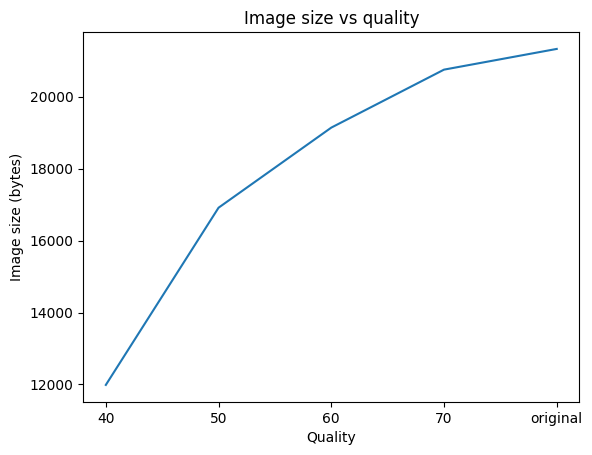

In [11]:

import matplotlib.pyplot as plt

plt.plot(quality_ranges + ['original'], image_sizes)
plt.title('Image size vs quality')
plt.xlabel('Quality')
plt.ylabel('Image size (bytes)')
plt.show()

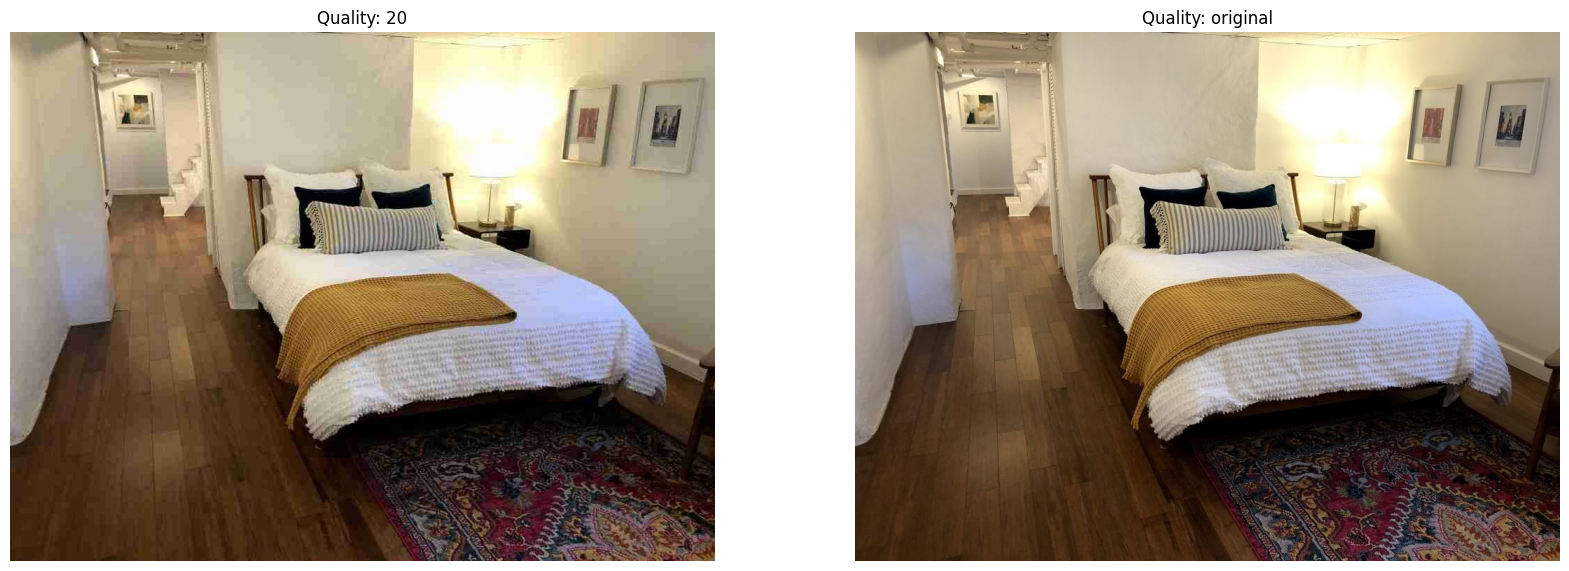

In [19]:

# Print the images side by side with the quality value

fig, axs = plt.subplots(1, len(all_images), figsize=(20, 20))

for i, (image, quality) in enumerate(zip(all_images, quality_ranges + ['original'])):
    axs[i].imshow(image.to_pil_image())
    axs[i].set_title(f'Quality: {quality}')
    axs[i].axis('off')
    